In [3]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
#Perform Hyperparameter Optimization
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense,Activation,Embedding,Flatten,LeakyReLU,BatchNormalization
from keras.activations import relu,sigmoid

from keras.layers import Dropout

In [12]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    


In [13]:
model = KerasClassifier(build_fn=create_model, verbose=0)


layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)


grid_result = grid.fit(X_train, y_train)

[grid_result.best_score_,grid_result.best_params_]


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



[0.8560000061988831,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': [45, 30, 15]}]

In [15]:
print(grid_result.best_score_,grid_result.best_params_)

0.8560000061988831 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [45, 30, 15]}


In [17]:

pred_y = grid.predict(X_test)
pred_y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [24]:

y_pred = (pred_y > 0.5)


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1532,   63],
       [ 213,  192]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [22]:
score

0.862

In [6]:
#ANN 

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [9]:
#Initialise the ANN
classifier = Sequential()

In [13]:
#Add input and hidden layers
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [14]:
#Add 2nd hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [16]:
#Add output layer

classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [29]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [30]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train, nb_epoch = 100)

C:\Users\amhotta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Epoch 1/100
8000/8000 [==============================] - 1s 157us/step - loss: 0.5472 - accuracy: 0.7889
Epoch 2/100
8000/8000 [==============================] - 1s 93us/step - loss: 0.4879 - accuracy: 0.7976
Epoch 3/100
8000/8000 [==============================] - 1s 88us/step - loss: 0.4626 - accuracy: 0.7994
Epoch 4/100
8000/8000 [==============================] - 1s 91us/step - loss: 0.4451 - accuracy: 0.8026
Epoch 5/100
8000/8000 [==============================] - 1s 89us/step - loss: 0.4317 - accuracy: 0.8090
Epoch 6/100
8000/8000 [==============================] - 1s 91us/step - loss: 0.4201 - accuracy: 0.8169
Epoch 7/100
8000/8000 [==============================] - 1s 95us/step - loss: 0.4088 - accuracy: 0.8259
Epoch 8/100
8000/8000 [==============================] - 1s 99us/step - loss: 0.3998 - accuracy: 0.8339
Epoch 9/100
8000/8000 [==============================] - 1s 98us/step - loss: 0.3912 - accuracy: 0.8381
Epoch 10/100
8000/8000 [==============================] - 1s 9

dict_keys(['loss', 'accuracy'])


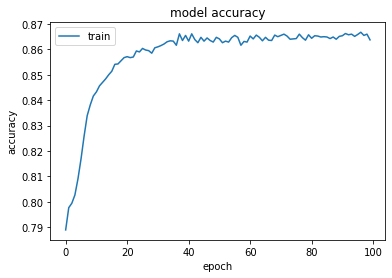

In [36]:

# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
#plt.plot(model_history.history['val'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



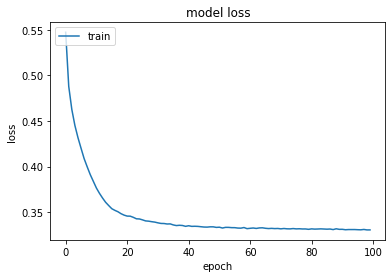

In [38]:
# summarize history for loss
plt.plot(model_history.history['loss'])
#plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




In [39]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [40]:
score

0.86